The goal of this notebook is to plot the histogram of the standard deviation for each voxel for the right central sulcus of UKB subjects

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/inputs.npy", mmap_mode="r")

In [3]:
output=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/outputs.npy", mmap_mode="r")

In [4]:
index = np.random.choice(len(input), 1000, replace=False)
input = input[index]
output= output[index]

In [5]:
input

array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0.

In [6]:
print(type(output))
print(output.shape)

<class 'numpy.ndarray'>
(1000, 2, 52, 40, 56)


In [7]:
output

array([[[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
           1.00000000e+00, 9.99999523e-01, 9.99995947e-01],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
           1.00000000e+00, 1.00000000e+00, 9.99992847e-01],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
           1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
           1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
           1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
           1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],

         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
           1.00000000e+00, 1.00000000e+00, 9.99999881e-01],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
           1.00000000e+00, 1.00000000e+00, 1.000000

In [11]:
input.shape

(42433, 1, 52, 40, 56)

In [8]:
output0= output[:,0,:,:,:]
output1= output[:,1,:,:,:]

Now, we consider the voxel defined by output[25][19][27] (a voxel in the center) 

We want to plot the distribution of this voxel for output0 and output1 in all the UKB subjects

In [9]:
voxel_center0= output[:,0,25,19,27]
voxel_center1= output[:,1,25,19,27]

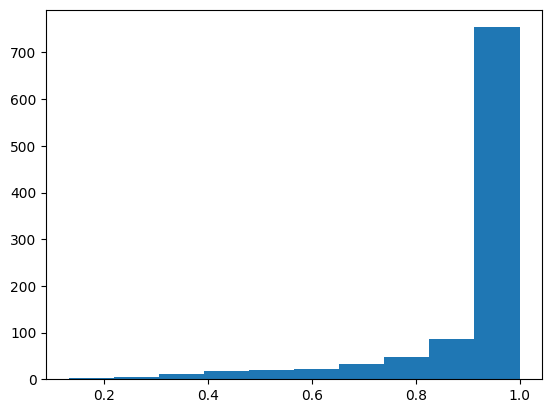

In [10]:
plt.hist(voxel_center0)
plt.show()

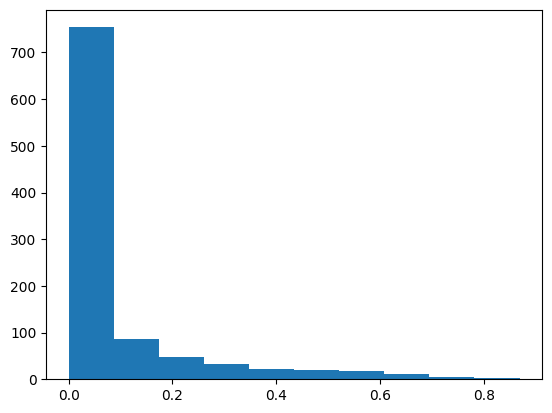

In [11]:
plt.hist(voxel_center1)
plt.show()

We'll now consider only output1 (so that ths histogram would be more interpretable) 

In [118]:
voxel_mean= np.mean(output1, axis=0)

In [119]:
voxel_mean= voxel_mean.flatten()

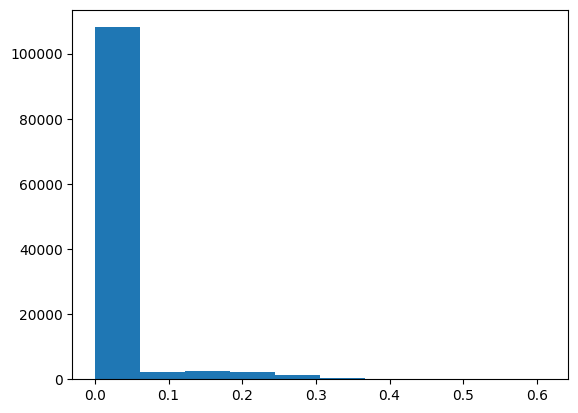

In [120]:
plt.hist(voxel_mean)
plt.show()

In [45]:
input.shape

(1000, 1, 52, 40, 56)

In [55]:
#We want to choose only the voxels corresponding to a "1" on the input
 
x, y, z= np.where(input[0][0] == 1) #The index of "1" in the first image

In [56]:

true_input = input[:,0, x, y, z]


In [121]:
true_output1=output1[:, x, y, z]

In [57]:
true_input.shape

(1000, 958)

In [122]:
true_output1.shape

(1000, 958)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


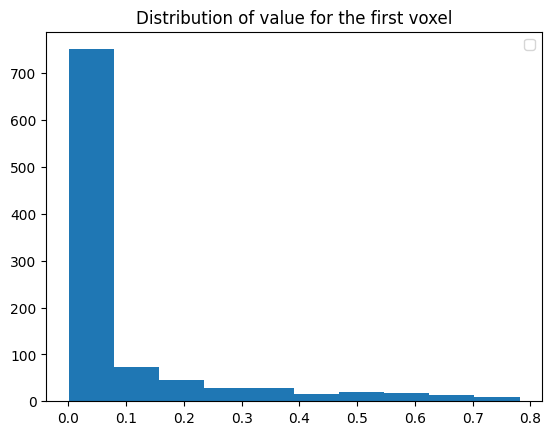

In [123]:
#Histogram for the first voxel of the output
first_voxel= true_output1[:,0]

plt.hist(first_voxel)
plt.title("Distribution of value for the first voxel")
plt.legend()
plt.show()

In [124]:
#The mean per voxel 
mean_voxel = np.mean(true_output1, axis=0)


In [125]:
mean_voxel.shape

(958,)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


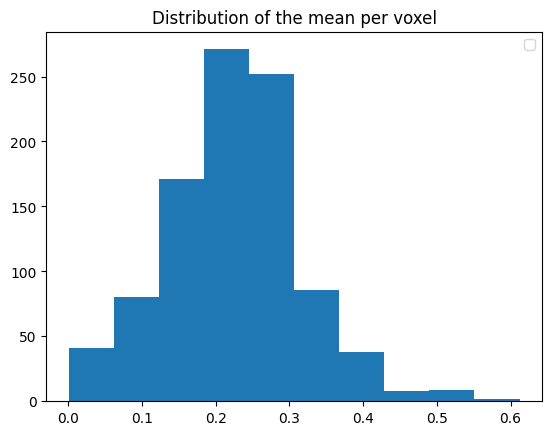

In [126]:
#Histogram of the distribution of the mean per voxel

plt.hist(mean_voxel)
plt.title("Distribution of the mean per voxel")
plt.legend()
plt.show()

In [127]:
#We select all the indexes between 0.4 and 0.5
index = np.where((mean_voxel >= 0.4) & (mean_voxel <= 0.5))
index


(array([ 88, 124, 132, 141, 173, 177, 218, 224, 225, 226, 264, 269, 275,
        282, 308, 316, 318, 343, 347, 353, 376, 379, 383, 396, 400]),)

In [128]:
index=index[0]
index

array([ 88, 124, 132, 141, 173, 177, 218, 224, 225, 226, 264, 269, 275,
       282, 308, 316, 318, 343, 347, 353, 376, 379, 383, 396, 400])

In [129]:
#We select a voxel with a mean between 0.4 and 0.5
i= np.random.choice(index)

voxel= true_output1[:,i]


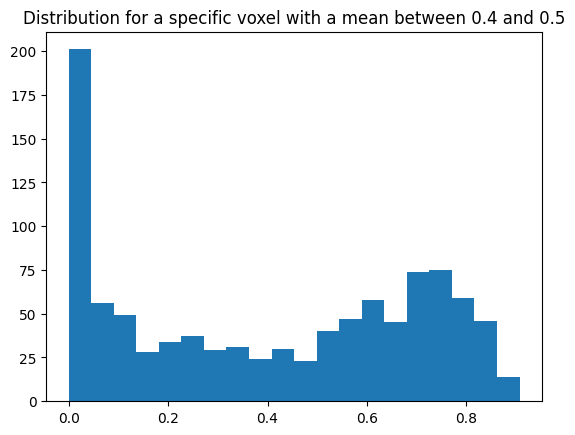

In [131]:
plt.hist(voxel, bins=20)
plt.title("Distribution for a specific voxel with a mean between 0.4 and 0.5")
plt.show()

Now, we want to plot the mean of the inputs per voxel, and then divide the intervals of the means into some sub-intervals, and consider a particular voxel in each   sub-intervals

In [132]:
input.shape

(1000, 1, 52, 40, 56)

In [133]:
mean_input= np.mean(input, axis=0)
mean_input.shape

(1, 52, 40, 56)

In [134]:
mean_input= mean_input[0]

In [135]:
mean_input_flat = mean_input.flatten()

In [136]:
output1_flat= output1.reshape(output1.shape[0], -1)

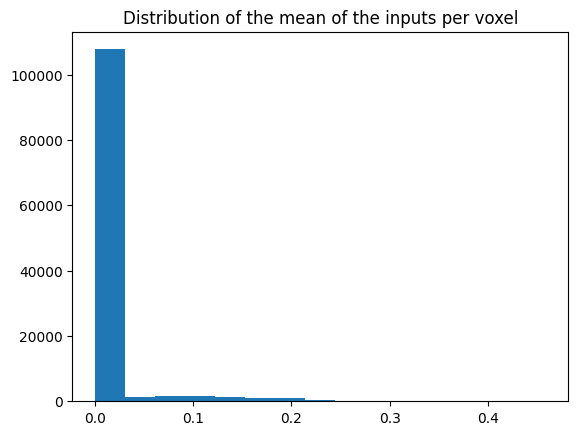

In [137]:
plt.hist(mean_input_flat, bins=15)
plt.title("Distribution of the mean of the inputs per voxel")
plt.show()

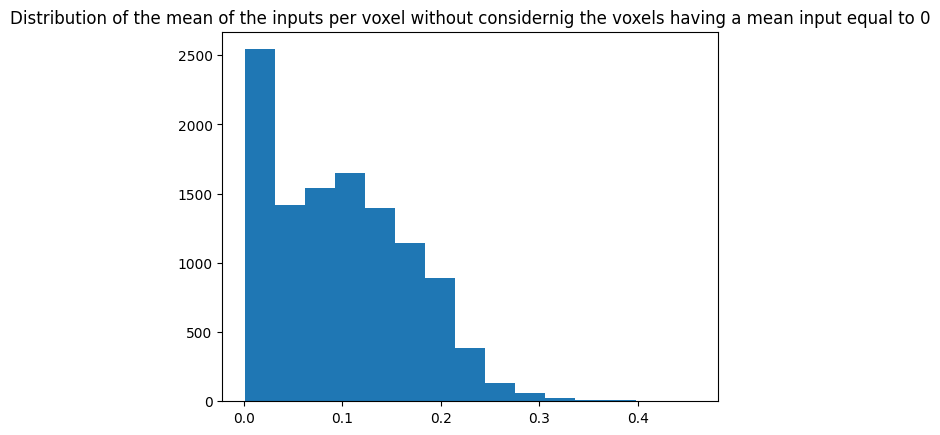

In [138]:
plt.hist(mean_input_flat[mean_input_flat!=0], bins=15)
plt.title("Distribution of the mean of the inputs per voxel without considernig the voxels having a mean input equal to 0")
plt.show()

In [139]:
max(mean_input_flat)

0.459

In [140]:
#We'll plot the distribution of output's values for several voxels: a voxel with the minimum mean input's value, a voxel with the maximum mean output's value (0.459), 
# and some others voxel chosen randomly inside some intervals with step size equal 0.05

#We chose randomly the voxels to consider 

x0 =  np.random.choice(np.where(mean_input_flat == min(mean_input_flat))[0])
x1 =  np.random.choice(np.where((mean_input_flat > 0) & (mean_input_flat <= 0.05))[0])
x2 =  np.random.choice(np.where((mean_input_flat > 0.05) & (mean_input_flat <= 0.1))[0])
x3 =  np.random.choice(np.where((mean_input_flat > 0.1) & (mean_input_flat <= 0.15))[0])
x4 =  np.random.choice(np.where((mean_input_flat > 0.15) & (mean_input_flat <= 0.2))[0])
x5 =  np.random.choice(np.where((mean_input_flat > 0.2) & (mean_input_flat <= 0.25))[0])
x6 =  np.random.choice(np.where((mean_input_flat > 0.25) & (mean_input_flat <= 0.3))[0])
x7 =  np.random.choice(np.where((mean_input_flat > 0.3) & (mean_input_flat <= 0.35))[0])
x8 =  np.random.choice(np.where((mean_input_flat > 0.35) & (mean_input_flat <= 0.4))[0])
x9 =  np.random.choice(np.where((mean_input_flat > 0.4) & (mean_input_flat < max(mean_input_flat)))[0])
x10 =  np.random.choice(np.where(mean_input_flat == max(mean_input_flat))[0])

In [141]:
indexes = [x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]

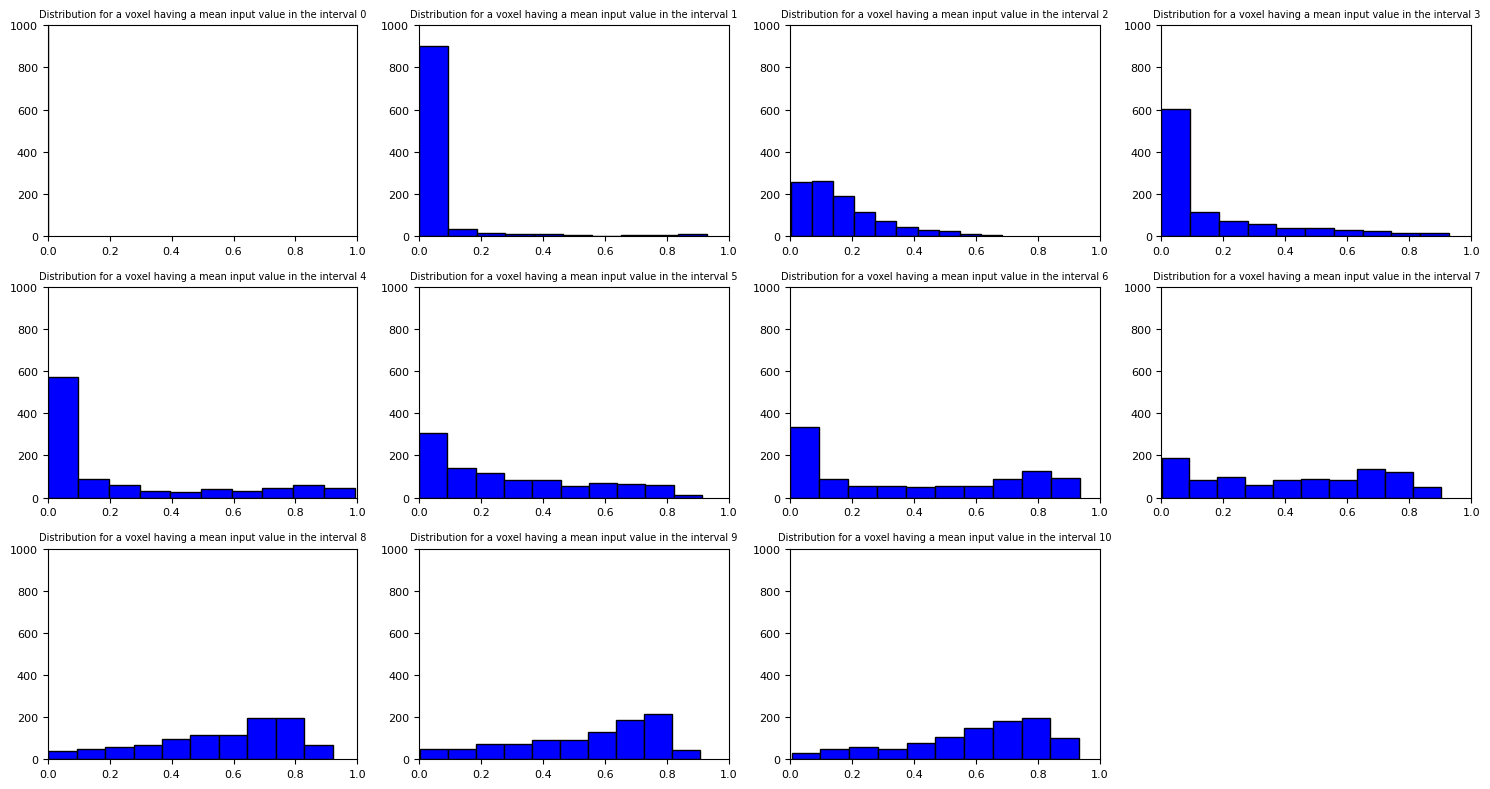

In [144]:
fig, axes = plt.subplots(3, 4, figsize=(15, 8))

axes = axes.flatten()  

for i in range(11):
    axes[i].hist(output1_flat[:,indexes[i]], bins=10, color='blue', edgecolor='black')
    axes[i].set_title(f'Distribution for a voxel having a mean input value in the interval {i}', fontsize=7)
    axes[i].tick_params(axis='both', labelsize=8)


fig.delaxes(axes[-1])

x_min = 0
x_max = 1
y_min, y_max = 0, 1000

for ax in axes[:-1]:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

In [145]:
input.shape

(1000, 1, 52, 40, 56)

In [146]:
input_flat= input.reshape(input.shape[0], -1)


(1000, 116480)

In [177]:
#for a given voxel, we want to split the population into two groups: those with an input equal to 0 and those with an input equal to 1,
# an then plot the output's value histogram for each group

def split(L,x): #x is the voxel's index and L is an array with shape(a,b) from which we want to split the rows
    index0= np.where(L[:,x]==0)[0]
    index1= np.where(L[:,x]==1)[0]

    return index0, index1

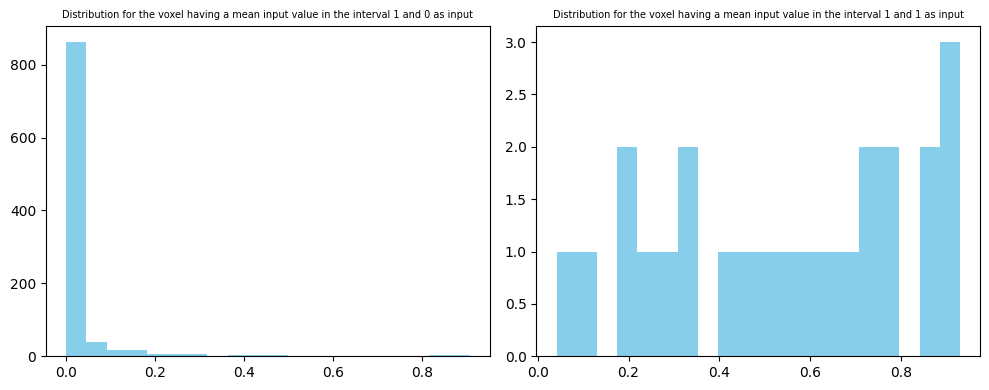

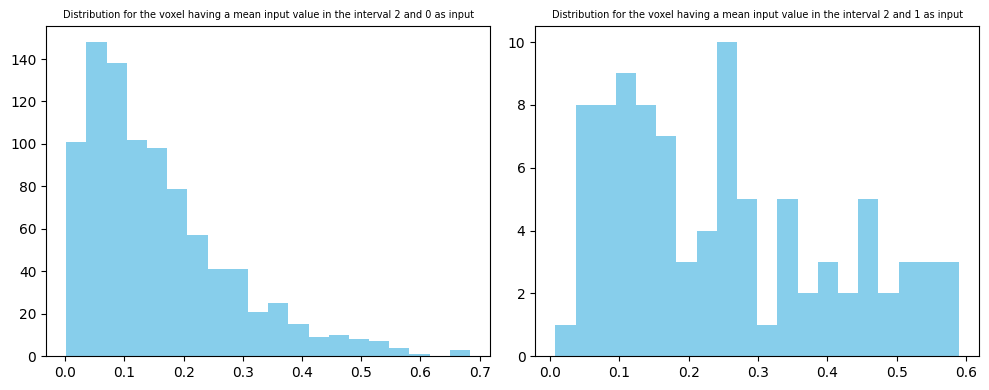

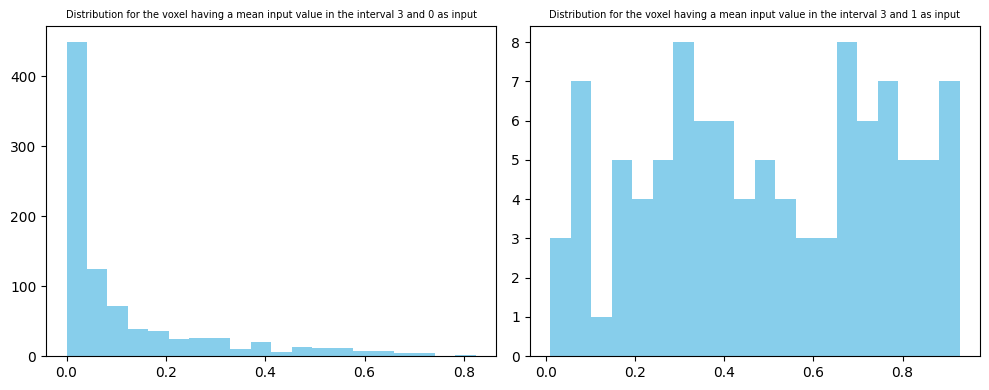

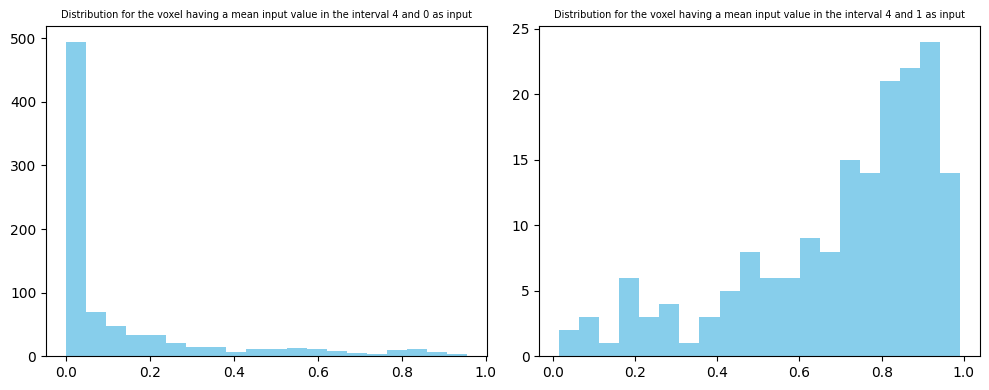

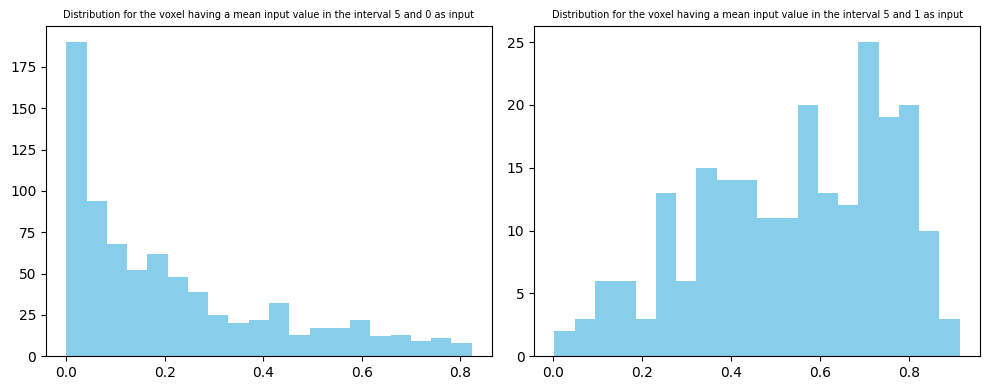

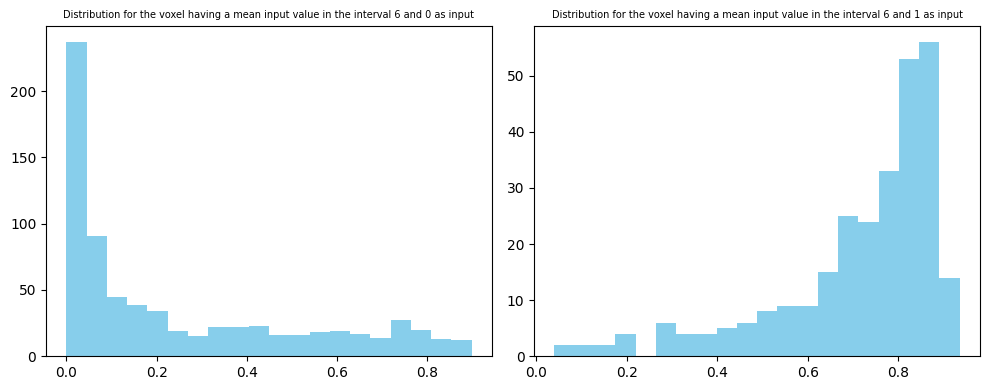

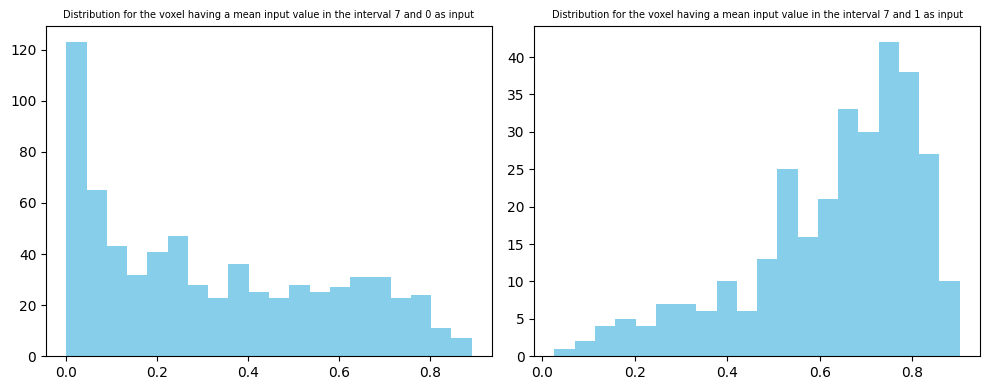

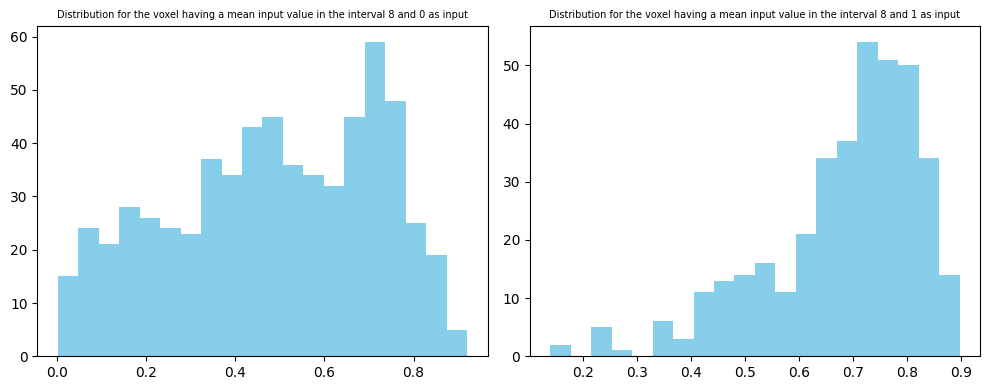

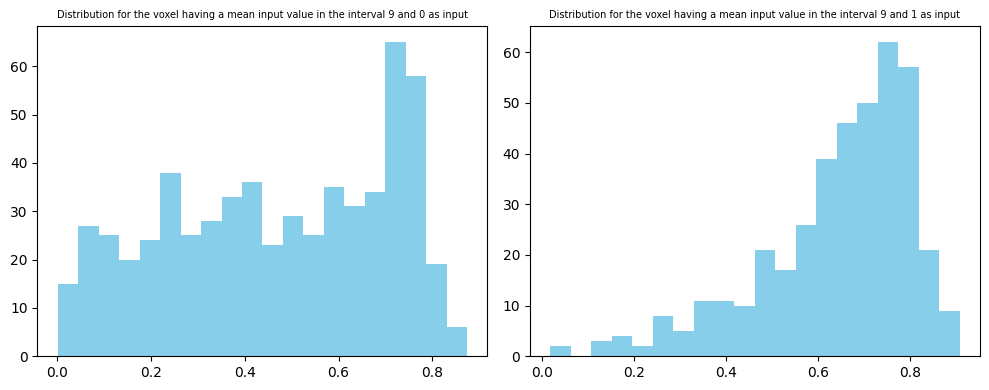

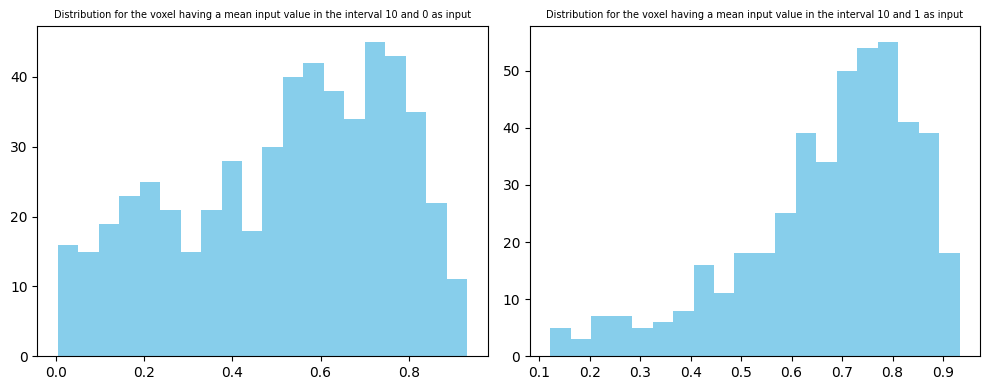

In [178]:
for i in range(1,len(indexes)): #We won't consider the first element in indexes  
    i0, i1= split(input_flat, indexes[i])
    y0 = output1_flat[i0, indexes[i]]
    y1 = output1_flat[i1, indexes[i]]

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    axes[0].hist(y0, bins= 20, color='skyblue')
    axes[0].set_title(f'Distribution for the voxel having a mean input value in the interval {i} and 0 as input', fontsize=7)

    axes[1].hist(y1, bins=20,color='skyblue')
    axes[1].set_title(f'Distribution for the voxel having a mean input value in the interval {i} and 1 as input', fontsize=7)

    plt.tight_layout()
    plt.show()

Now, we want to implement a Normal score (z-score généralisé)

In [154]:
def F_emp(X, x): #To compute the empirical CDF (Cumulative Distribution Function) of a distribution whith observations in the list X
    return np.mean(X <= x)

In [175]:
from scipy.stats import norm

def Normal_score(L_train, L_test): #L_train and L_test being two list, thsi function compute the normal-score using an initial distribution with observations L_train and return a list of Normal-score for each element in L_test
    result=[]

    for x in L_test:
        F=F_emp(L_train,x)
        p = np.clip(F, 1e-6, 1 - 1e-6)
        z = norm.ppf(p)  #the Normal-score
        result.append(z)
    return result

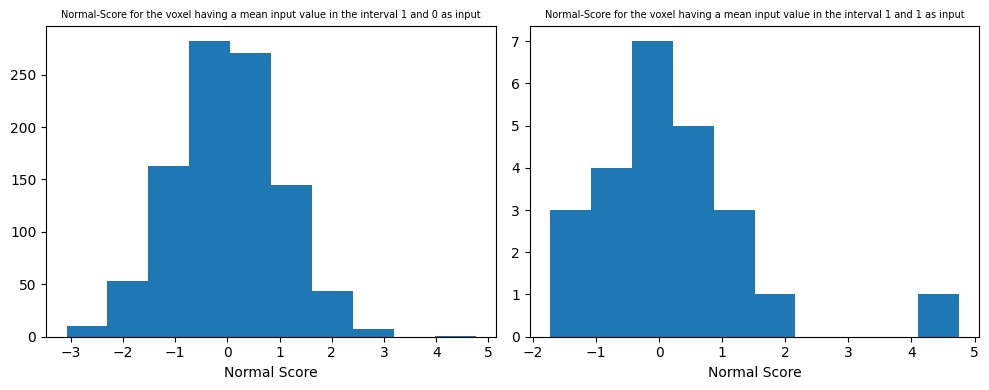

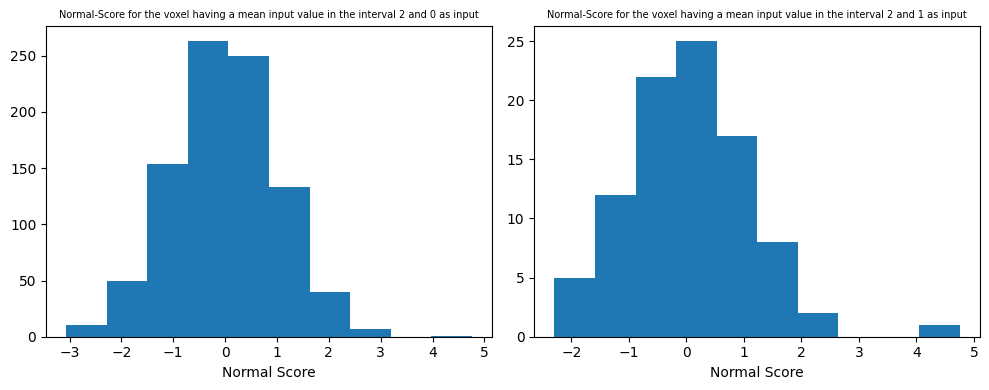

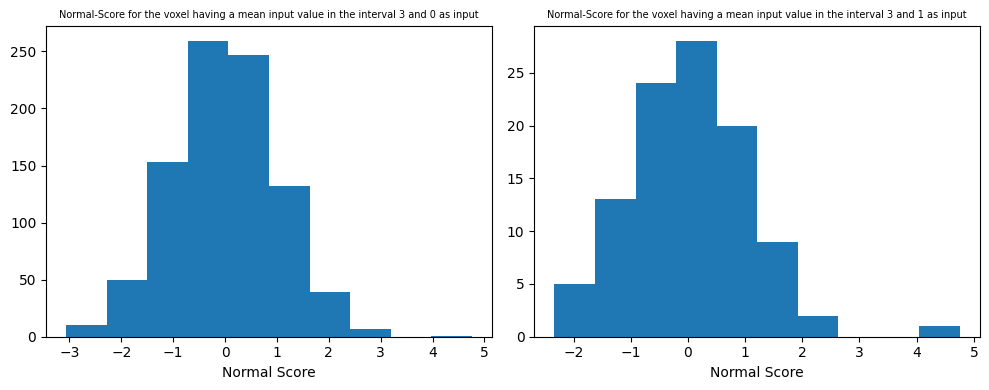

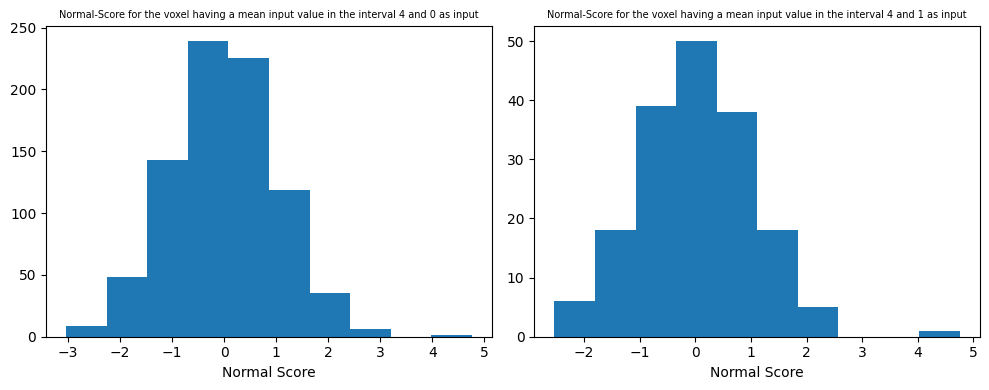

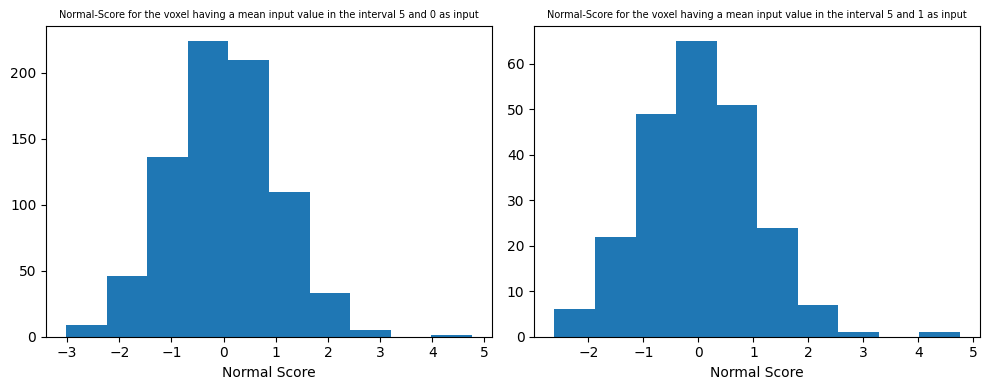

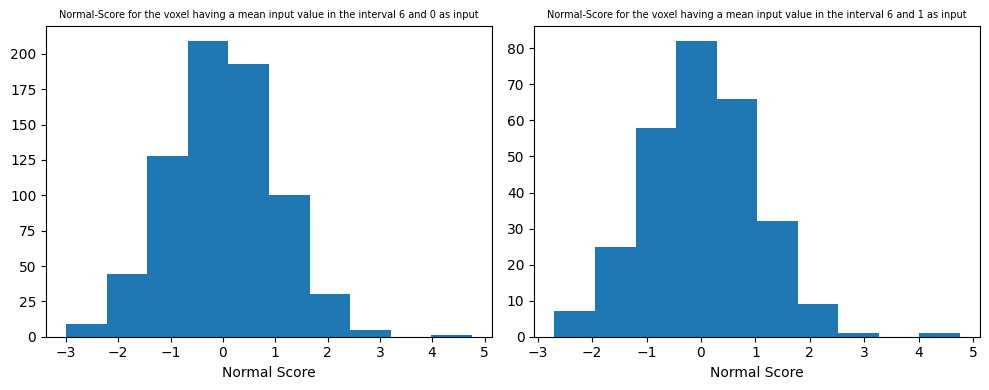

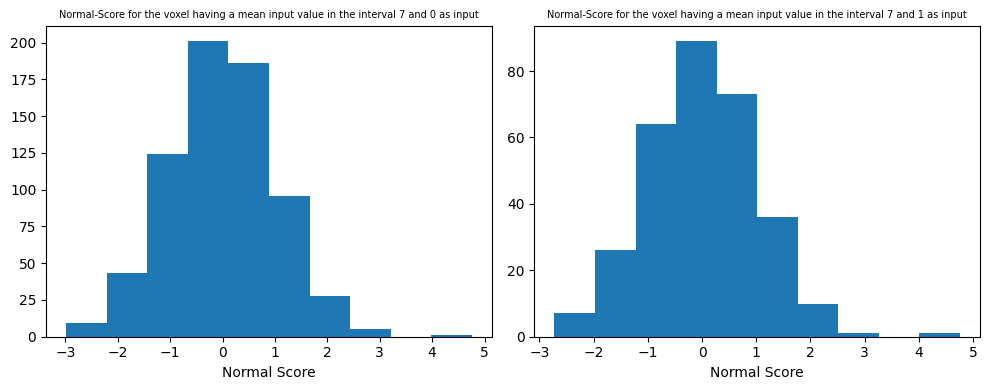

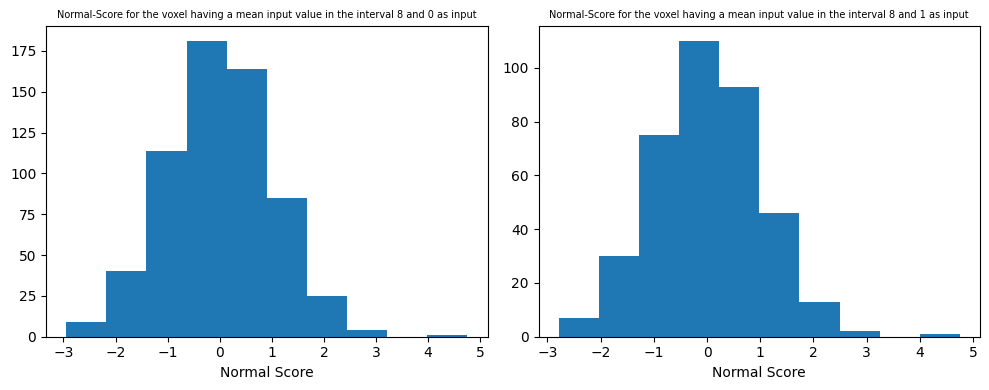

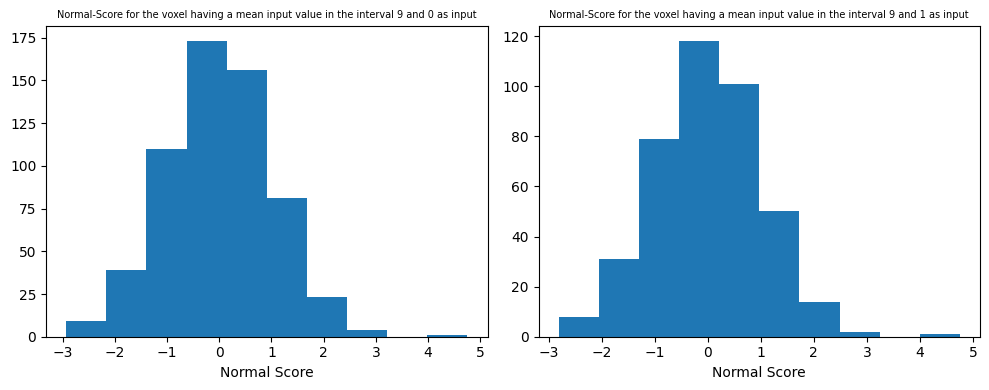

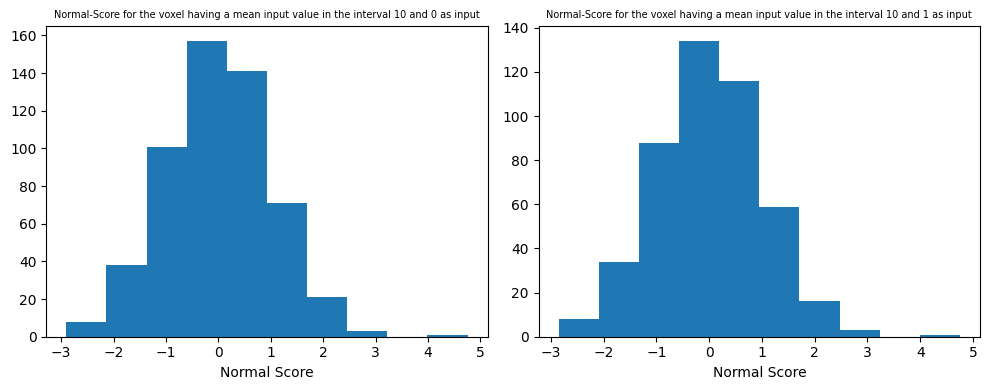

In [179]:
for i in range(1,len(indexes)): #We won't consider the first element in indexes  
    i0, i1= split(input_flat, indexes[i])
    y0 = output1_flat[i0, indexes[i]]
    y1 = output1_flat[i1, indexes[i]]

    z0=Normal_score(y0,y0) #to compute the "z-score"
    z1=Normal_score(y1,y1)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    axes[0].hist(z0)
    axes[0].set_title(f'Normal-Score for the voxel having a mean input value in the interval {i} and 0 as input', fontsize=7)
    axes[0].set_xlabel('Normal Score')
  
    axes[1].hist(z1)
    axes[1].set_title(f'Normal-Score for the voxel having a mean input value in the interval {i} and 1 as input', fontsize=7)
    axes[1].set_xlabel('Normal Score')

    plt.tight_layout()
    plt.show()

<span style="font-size:20px; font-weight:bold"> Now, we want to include hcp and epiplepsy_PBS datasets </span>

In [169]:
output_hcp=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/hcp/outputs.npy")
output_epilepsy=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/epilepsy_PBS/outputs.npy")

In [180]:
input_hcp=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/hcp/inputs.npy")
input_epilepsy=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/epilepsy_PBS/inputs.npy")

In [182]:
input_epilepsy

array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0.

In [170]:
print(output_hcp.shape)
print(output_epilepsy.shape)

(1114, 2, 52, 40, 56)
(57, 2, 52, 40, 56)


In [171]:
output1_hcp= output_hcp[:,1,:,:,:]
output1_epilepsy= output_epilepsy[:,1,:,:,:]

In [172]:
output1_hcp_flat= output1_hcp.reshape(output1_hcp.shape[0], -1)
output1_epilepsy_flat= output1_epilepsy.reshape(output1_epilepsy.shape[0], -1)

In [181]:
input_hcp_flat= input_hcp.reshape(input_hcp.shape[0], -1)
input_epilepsy_flat= input_epilepsy.reshape(input_epilepsy.shape[0], -1)

In [185]:
index_irm_neg = [19,21,26,28,31,34,35,38,40,41,43,44,45]
index_irm_pos=[20,22,23,24,25,27,29,30,32,33,36,37,39,42,46,47,48,49,50,51,52,53,54,55,56]

In [186]:
input_control= input_epilepsy_flat[0:19]
output_control= output1_epilepsy_flat[0:19]

input_irm_neg= input_epilepsy_flat[index_irm_neg]
output_irm_neg= output1_epilepsy_flat[index_irm_neg]

input_irm_pos= input_epilepsy_flat[index_irm_pos]
output_irm_pos= output1_epilepsy_flat[index_irm_pos]

/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/.venv/lib/python3.8/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


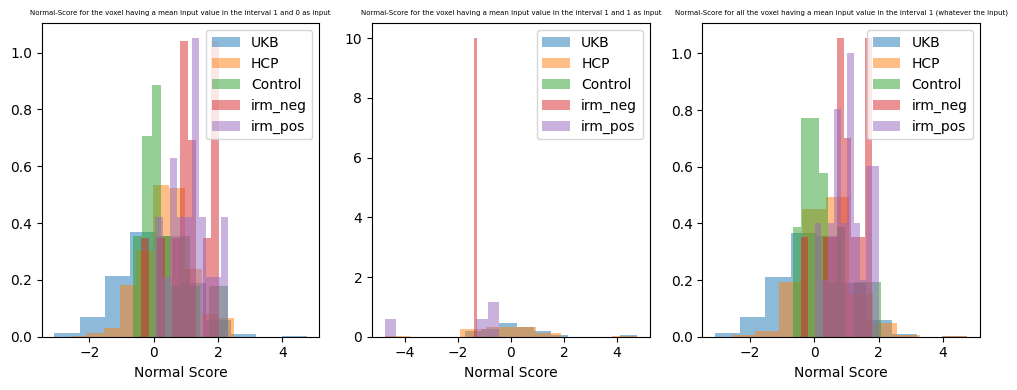

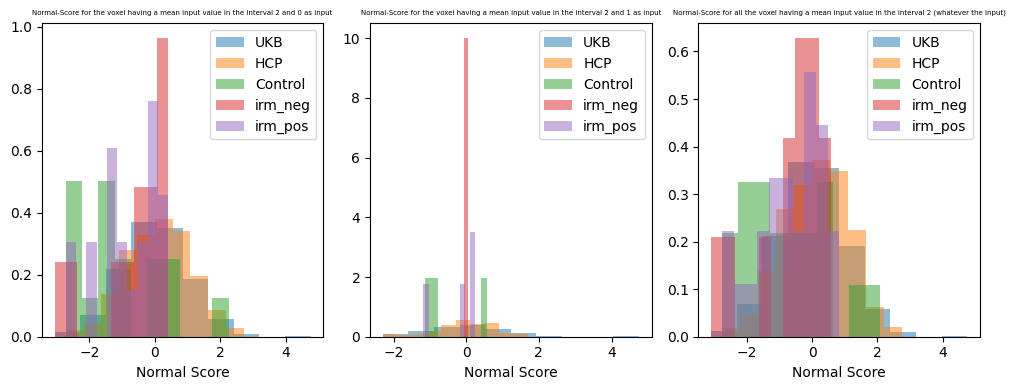

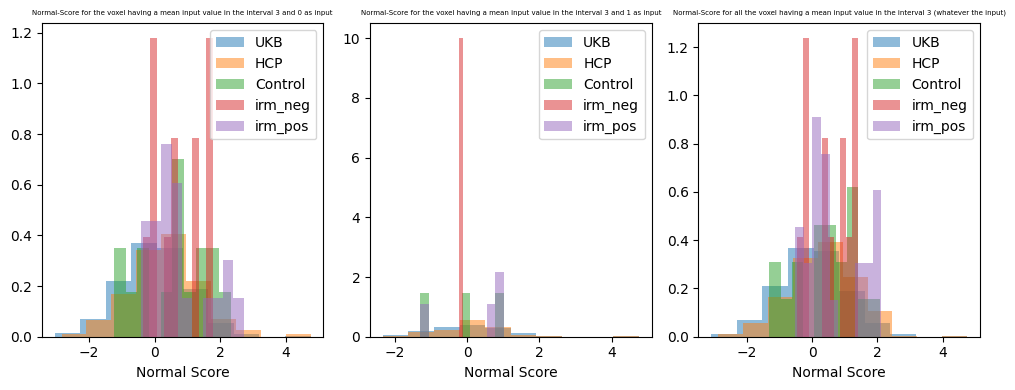

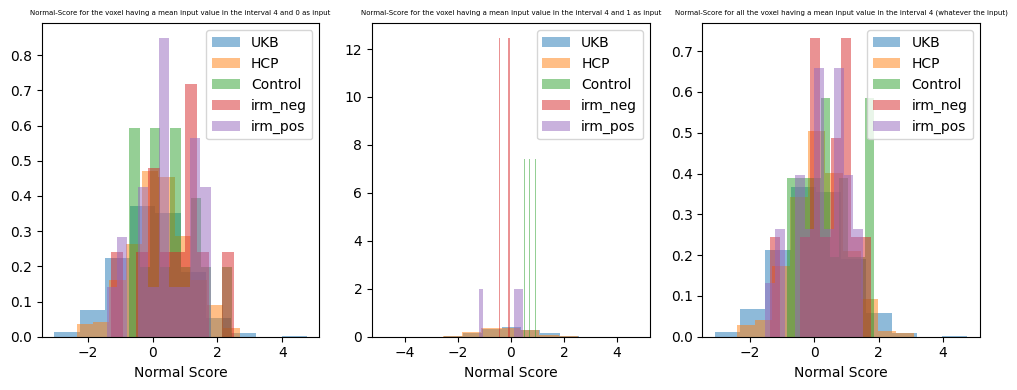

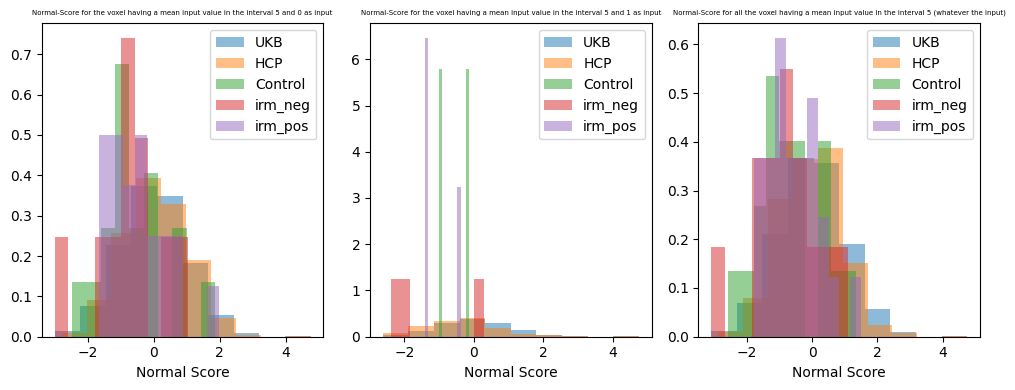

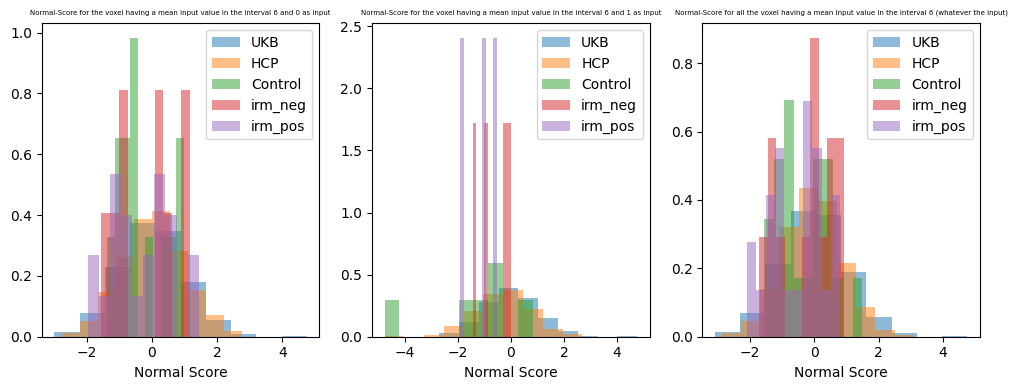

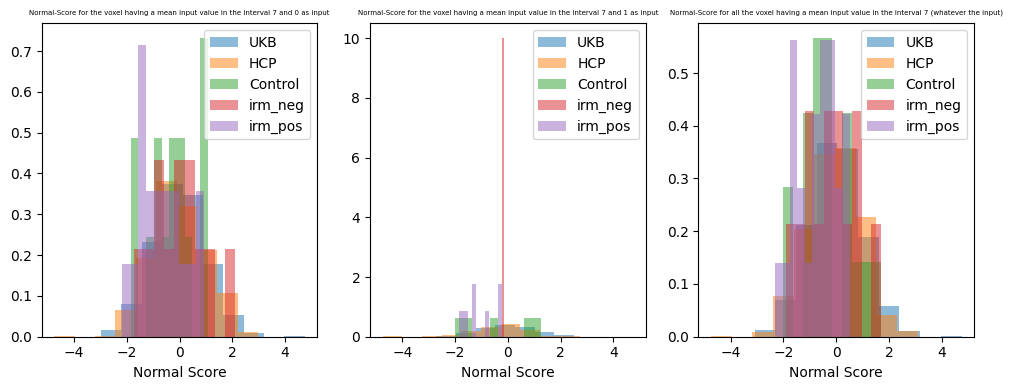

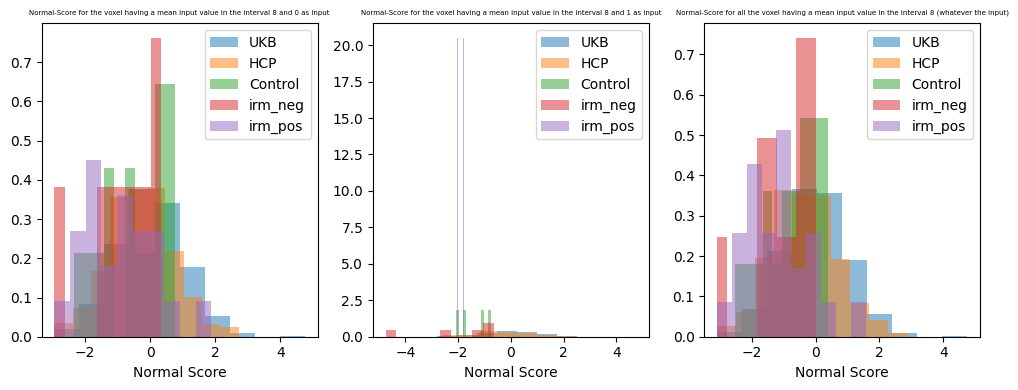

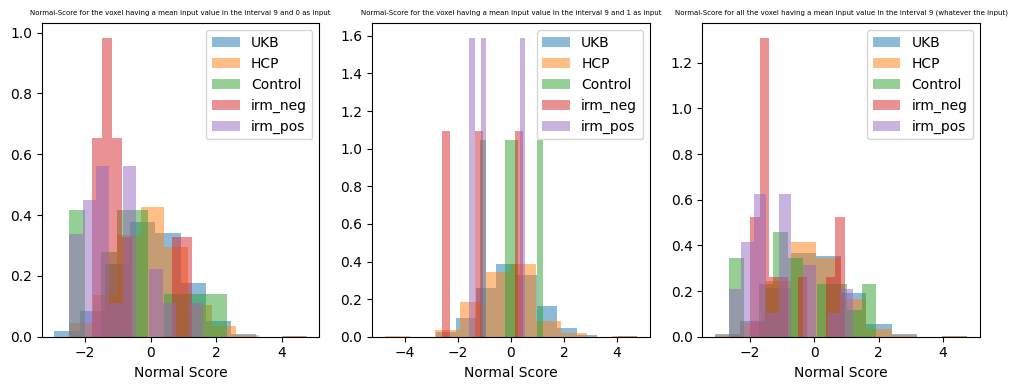

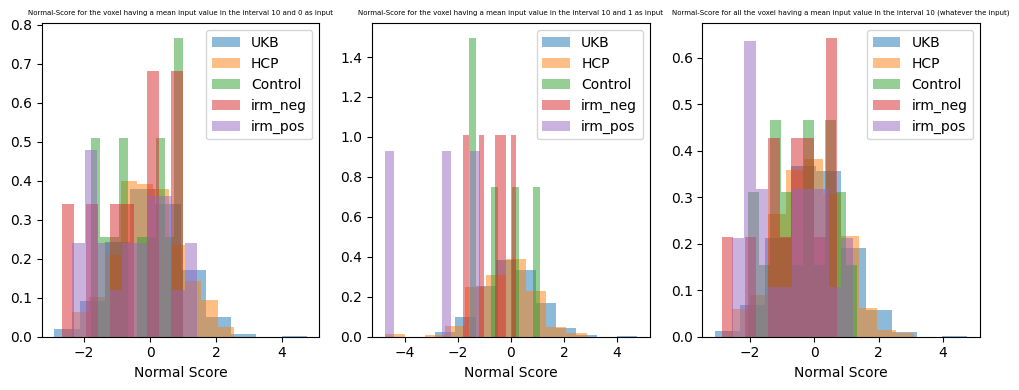

In [198]:
for i in range(1,len(indexes)): #We won't consider the first element in indexes  
    i0, i1= split(input_flat,indexes[i])
    y0 = output1_flat[i0, indexes[i]]
    y1 = output1_flat[i1, indexes[i]]
    y2= output1_flat[:, indexes[i]]

    i0, i1= split(input_hcp_flat,indexes[i])
    y0_hcp = output1_hcp_flat[i0, indexes[i]]
    y1_hcp = output1_hcp_flat[i1, indexes[i]]
    y2_hcp= output1_hcp_flat[:, indexes[i]]

    i0, i1= split(input_control,indexes[i])
    y0_control = output_control[i0, indexes[i]]
    y1_control = output_control[i1, indexes[i]]
    y2_control= output_control[:, indexes[i]]

    i0, i1= split(input_irm_neg,indexes[i])
    y0_irm_neg = output_irm_neg[i0, indexes[i]]
    y1_irm_neg = output_irm_neg[i1, indexes[i]]
    y2_irm_neg = output_irm_neg[:, indexes[i]]

    i0, i1= split(input_irm_pos,indexes[i])
    y0_irm_pos = output_irm_pos[i0, indexes[i]]
    y1_irm_pos = output_irm_pos[i1, indexes[i]]
    y2_irm_pos = output_irm_pos[:, indexes[i]]

    z0=Normal_score(y0,y0)
    z0_hcp= Normal_score(y0,y0_hcp)
    z0_control= Normal_score(y0,y0_control)
    z0_irm_neg= Normal_score(y0,y0_irm_neg)
    z0_irm_pos= Normal_score(y0,y0_irm_pos)

    z1=Normal_score(y1,y1)
    z1_hcp= Normal_score(y1,y1_hcp)
    z1_control= Normal_score(y1,y1_control)
    z1_irm_neg= Normal_score(y1,y1_irm_neg)
    z1_irm_pos= Normal_score(y1,y1_irm_pos)

    z2=Normal_score(y2,y2)
    z2_hcp= Normal_score(y2,y2_hcp)
    z2_control= Normal_score(y2,y2_control)
    z2_irm_neg= Normal_score(y2,y2_irm_neg)
    z2_irm_pos= Normal_score(y2,y2_irm_pos)

    fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=False)

    density =True

    axes[0].hist(z0, label='UKB', alpha=0.5, density=density)
    axes[0].hist(z0_hcp, label='HCP', alpha=0.5, density=density)
    axes[0].hist(z0_control, label='Control', alpha=0.5, density=density)
    axes[0].hist(z0_irm_neg, label='irm_neg', alpha=0.5, density=density)
    axes[0].hist(z0_irm_pos, label='irm_pos', alpha=0.5, density=density)
    axes[0].set_title(f'Normal-Score for the voxel having a mean input value in the interval {i} and 0 as input', fontsize=5)
    axes[0].legend()
    axes[0].set_xlabel('Normal Score')
  
    axes[1].hist(z1, label='UKB', alpha=0.5, density=density)
    axes[1].hist(z1_hcp, label='HCP', alpha=0.5, density=density)
    axes[1].hist(z1_control, label='Control', alpha=0.5, density=density)
    axes[1].hist(z1_irm_neg, label='irm_neg', alpha=0.5, density=density)
    axes[1].hist(z1_irm_pos, label='irm_pos', alpha=0.5, density=density)
    axes[1].set_title(f'Normal-Score for the voxel having a mean input value in the interval {i} and 1 as input', fontsize=5)
    axes[1].legend()
    axes[1].set_xlabel('Normal Score')

    axes[2].hist(z2, label='UKB', alpha=0.5, density=density)
    axes[2].hist(z2_hcp, label='HCP', alpha=0.5, density=density)
    axes[2].hist(z2_control, label='Control', alpha=0.5, density=density)
    axes[2].hist(z2_irm_neg, label='irm_neg', alpha=0.5, density=density)
    axes[2].hist(z2_irm_pos, label='irm_pos', alpha=0.5, density=density)
    axes[2].set_title(f'Normal-Score for all the voxel having a mean input value in the interval {i} (whatever the input)', fontsize=5)
    axes[2].legend()
    axes[2].set_xlabel('Normal Score')

    plt.tight_layout()
    plt.show()